In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Regression Libraries libraries
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

# Other ML Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


#seaborn theme
sns.set_theme(style="whitegrid")

In [2]:
sales = pd.read_csv('http://bit.ly/AdvertisingDataset')
sales

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
sales = sales.drop(['Unnamed: 0'], axis=1)
sales

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [4]:
sales.dtypes

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object

In [5]:
sales[['TV', 'radio', 'newspaper']].corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


<AxesSubplot:>

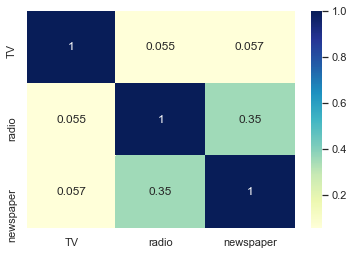

In [10]:
sns.heatmap(sales[['TV', 'radio', 'newspaper']].corr(), annot=True, cmap="YlGnBu")

<AxesSubplot:xlabel='TV', ylabel='sales'>

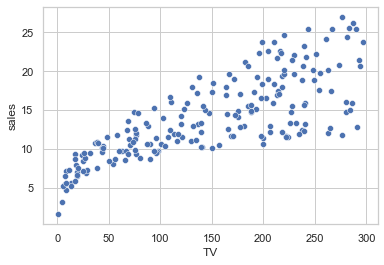

In [11]:
# TV vs sales
sns.scatterplot(data=sales, x='TV', y='sales')

<AxesSubplot:xlabel='radio', ylabel='sales'>

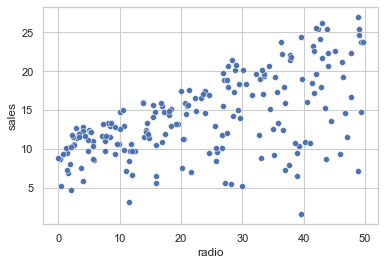

In [12]:
sns.scatterplot(data=sales, x='radio', y='sales')

<AxesSubplot:xlabel='newspaper', ylabel='sales'>

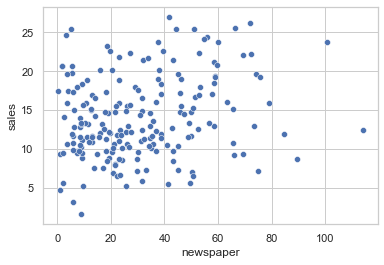

In [13]:
sns.scatterplot(data=sales, x='newspaper', y='sales')

In [32]:
# X and y

X = sales[['TV', 'radio', 'newspaper']].values
X1 = sales[['TV']].values
y = sales['sales']

In [34]:
X1

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [19]:
# Lets do linear the tutajua
linear = LinearRegression()

linear.fit(X, y)


LinearRegression()

In [20]:
y_pred = linear.predict(X)

print('RMSE of the model is : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))

RMSE of the model is :  1.6685701407225697


In [25]:
df = pd.DataFrame({'OG' : y, 'predictions' : y_pred})
df

,OG,predictions
0,22.1,20.523974
1,10.4,12.337855
2,9.3,12.307671
3,18.5,17.597830
4,12.9,13.188672
...,...,...
195,7.6,5.370342
196,9.7,8.165312
197,12.8,12.785921
198,25.5,23.767321


ValueError: x and y must be the same size

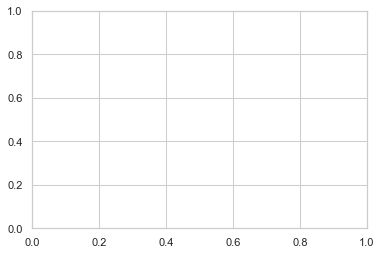

In [42]:
plt.scatter(X, y)
# plt.plot(X, y_pred, color='red')

In [35]:
linear = LinearRegression()

linear.fit(X1, y)

tv_pred = linear.predict(X1)

print('RMSE of the model is : ', np.sqrt(metrics.mean_squared_error(y, tv_pred)))

RMSE of the model is :  3.2423221486546887


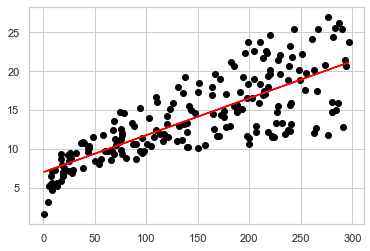

In [39]:
plt.scatter(X1, y, color='black')
plt.plot(X1, tv_pred, color='red')